In [60]:
!pip install seaborn

In [183]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=10, n_estimators=100, subsample=0.6; total time=   1.6s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=50, n_estimators=20, subsample=0.6; total time=   1.9s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=50, n_estimators=50, subsample=0.3; total time=   2.6s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=50, n_estimators=50, subsample=0.9; total time=   3.5s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=50, n_estimators=100, subsample=0.6; total time=   4.4s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=100, n_estimators=20, subsample=0.6; total time=   1.6s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=100, n_estimators=50, subsample=0.3; total time=   2.5s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6, max_depth=100, n_estimators=50, subsample=0.9; total time=   3.5s
[CV] END colsample_bynode=0.3, colsample_bytree=0.6

In [127]:
pd.set_option("display.max_columns", None)

In [3]:
data = pd.read_csv("Loan_default.csv")

In [4]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [5]:
len(data)

255347

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [9]:
data["Default"].value_counts(normalize=False)

Default
0    225694
1     29653
Name: count, dtype: int64

In [19]:
data1, data2 = train_test_split(data, test_size=0.5, random_state=1, stratify=data[["Default", "Education", "MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]])

In [20]:
data1["Default"].value_counts(normalize=True)

Default
0    0.882935
1    0.117065
Name: proportion, dtype: float64

In [21]:
data2["Default"].value_counts(normalize=True)

Default
0    0.884808
1    0.115192
Name: proportion, dtype: float64

In [22]:
data2.to_csv("leftover.csv", index=False)

In [23]:
data1.to_csv("workshop_data.csv", index=False)

In [24]:
data = pd.read_csv("workshop_data.csv")

In [25]:
data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,GIH2FH43BK,51,31607,148200,563,42,2,21.93,24,0.40,Master's,Part-time,Married,Yes,No,Education,Yes,1
1,NWPJFU16WS,45,53901,51224,814,85,1,20.82,12,0.39,Bachelor's,Self-employed,Single,No,Yes,Home,Yes,0
2,62QULG5WLC,53,135547,232738,330,22,3,2.31,36,0.59,High School,Unemployed,Single,No,No,Auto,Yes,0
3,H4ITMMVE7Z,35,144527,34946,657,14,3,5.19,24,0.70,Bachelor's,Part-time,Divorced,Yes,Yes,Home,No,0
4,0CEGY5MPM8,23,125449,139805,455,14,2,5.61,48,0.25,High School,Full-time,Single,Yes,Yes,Home,Yes,0


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127673 entries, 0 to 127672
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          127673 non-null  object 
 1   Age             127673 non-null  int64  
 2   Income          127673 non-null  int64  
 3   LoanAmount      127673 non-null  int64  
 4   CreditScore     127673 non-null  int64  
 5   MonthsEmployed  127673 non-null  int64  
 6   NumCreditLines  127673 non-null  int64  
 7   InterestRate    127673 non-null  float64
 8   LoanTerm        127673 non-null  int64  
 9   DTIRatio        127673 non-null  float64
 10  Education       127673 non-null  object 
 11  EmploymentType  127673 non-null  object 
 12  MaritalStatus   127673 non-null  object 
 13  HasMortgage     127673 non-null  object 
 14  HasDependents   127673 non-null  object 
 15  LoanPurpose     127673 non-null  object 
 16  HasCoSigner     127673 non-null  object 
 17  Default   

In [26]:
estratos = ["Default", "Education", "MaritalStatus", "HasMortgage", "HasDependents", "LoanPurpose", "HasCoSigner"]

In [28]:
train_data, temp_data = train_test_split(data, test_size=0.3, stratify=data[estratos], random_state=1)

In [30]:
val_data, test_data = train_test_split(temp_data, test_size=0.50, stratify=temp_data[estratos], random_state=1)

In [31]:
test_data.to_csv("test_data.csv", index=False)

In [34]:
train_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
9987,SPEC99U9QC,19,134661,80894,504,91,3,11.62,36,0.75,High School,Full-time,Divorced,No,No,Education,No,1
119957,5O885EPOMF,47,125379,106212,332,35,4,21.56,12,0.74,High School,Unemployed,Single,No,No,Auto,Yes,0
80247,NV76OEJDWK,61,99506,227468,733,107,4,19.52,12,0.28,Bachelor's,Full-time,Divorced,Yes,No,Home,No,0
5449,563L3PZL6F,68,105594,206318,366,119,4,14.89,12,0.47,Master's,Unemployed,Single,No,No,Business,Yes,0
100055,CFWUXIH6V7,57,60101,206292,400,31,3,23.38,48,0.74,PhD,Self-employed,Divorced,No,Yes,Home,No,0


In [35]:
train_data.groupby("Education")["Default"].value_counts(normalize=True)

Education    Default
Bachelor's   0          0.877691
             1          0.122309
High School  0          0.869975
             1          0.130025
Master's     0          0.889758
             1          0.110242
PhD          0          0.892936
             1          0.107064
Name: proportion, dtype: float64

In [36]:
train_data.groupby("EmploymentType")["Default"].value_counts(normalize=True)

EmploymentType  Default
Full-time       0          0.905306
                1          0.094694
Part-time       0          0.879956
                1          0.120044
Self-employed   0          0.884236
                1          0.115764
Unemployed      0          0.860966
                1          0.139034
Name: proportion, dtype: float64

In [37]:
train_data.groupby("MaritalStatus")["Default"].value_counts(normalize=True)

MaritalStatus  Default
Divorced       0          0.873442
               1          0.126558
Married        0          0.894658
               1          0.105342
Single         0          0.879533
               1          0.120467
Name: proportion, dtype: float64

In [38]:
train_data.groupby("HasMortgage")["Default"].value_counts(normalize=True)

HasMortgage  Default
No           0          0.875327
             1          0.124673
Yes          0          0.889784
             1          0.110216
Name: proportion, dtype: float64

In [39]:
train_data.groupby("HasDependents")["Default"].value_counts(normalize=True)

HasDependents  Default
No             0          0.871409
               1          0.128591
Yes            0          0.893693
               1          0.106307
Name: proportion, dtype: float64

In [40]:
train_data.groupby("LoanPurpose")["Default"].value_counts(normalize=True)

LoanPurpose  Default
Auto         0          0.880124
             1          0.119876
Business     0          0.875188
             1          0.124812
Education    0          0.880215
             1          0.119785
Home         0          0.896373
             1          0.103627
Other        0          0.880844
             1          0.119156
Name: proportion, dtype: float64

In [41]:
train_data.groupby("HasCoSigner")["Default"].value_counts(normalize=True)

HasCoSigner  Default
No           0          0.870023
             1          0.129977
Yes          0          0.895087
             1          0.104913
Name: proportion, dtype: float64

In [45]:
ed_emp_types = train_data.groupby(["Education", "EmploymentType"])["Default"].value_counts(normalize=True)

In [48]:
ed_emp_types = ed_emp_types.reset_index()

In [49]:
ed_emp_types.head()

,Education,EmploymentType,Default,proportion
0,Bachelor's,Full-time,0,0.897491
1,Bachelor's,Full-time,1,0.102509
2,Bachelor's,Part-time,0,0.877387
3,Bachelor's,Part-time,1,0.122613
4,Bachelor's,Self-employed,0,0.876621


In [52]:
ed_emp_types[ed_emp_types["Default"] == 1].set_index(["Education", "EmploymentType"])

Default  proportion
Education   EmploymentType                     
Bachelor's  Full-time             1    0.102509
            Part-time             1    0.122613
            Self-employed         1    0.123379
            Unemployed            1    0.140136
High School Full-time             1    0.100887
            Part-time             1    0.132989
            Self-employed         1    0.134013
            Unemployed            1    0.152422
Master's    Full-time             1    0.084614
            Part-time             1    0.117406
            Self-employed         1    0.104944
            Unemployed            1    0.134122
PhD         Full-time             1    0.090612
            Part-time             1    0.107111
            Self-employed         1    0.100975
            Unemployed            1    0.129275

In [53]:
train_data.groupby("Default")["CreditScore"].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,78875.0,576.009154,158.637158,300.0,439.0,575.0,714.0,849.0
1,10496.0,558.445979,159.802352,300.0,419.0,552.0,695.0,849.0


In [66]:
data["CreditScoreBucket"] = pd.cut(data["CreditScore"], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1001])

In [55]:
train_data["CreditScoreBucket"] = pd.cut(train_data["CreditScore"], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1001])

In [57]:
train_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,CreditScoreBucket
9987,SPEC99U9QC,19,134661,80894,504,91,3,11.62,36,0.75,High School,Full-time,Divorced,No,No,Education,No,1,"(500, 600]"
119957,5O885EPOMF,47,125379,106212,332,35,4,21.56,12,0.74,High School,Unemployed,Single,No,No,Auto,Yes,0,"(300, 400]"
80247,NV76OEJDWK,61,99506,227468,733,107,4,19.52,12,0.28,Bachelor's,Full-time,Divorced,Yes,No,Home,No,0,"(700, 800]"
5449,563L3PZL6F,68,105594,206318,366,119,4,14.89,12,0.47,Master's,Unemployed,Single,No,No,Business,Yes,0,"(300, 400]"
100055,CFWUXIH6V7,57,60101,206292,400,31,3,23.38,48,0.74,PhD,Self-employed,Divorced,No,Yes,Home,No,0,"(300, 400]"


In [58]:
train_data.groupby("CreditScoreBucket")["Default"].value_counts(normalize=True)

/var/folders/h2/_bm1jp99475dcdr3xrm_3tn40000gn/T/ipykernel_79188/413011170.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby("CreditScoreBucket")["Default"].value_counts(normalize=True)


CreditScoreBucket  Default
(0, 100]           0          0.000000
                   1          0.000000
(100, 200]         0          0.000000
                   1          0.000000
(200, 300]         0          0.832215
                   1          0.167785
(300, 400]         0          0.862873
                   1          0.137127
(400, 500]         0          0.876829
                   1          0.123171
(500, 600]         0          0.882342
                   1          0.117658
(600, 700]         0          0.889392
                   1          0.110608
(700, 800]         0          0.894316
                   1          0.105684
(800, 900]         0          0.898390
                   1          0.101610
(900, 1001]        0          0.000000
                   1          0.000000
Name: proportion, dtype: float64

<Axes: xlabel='Default', ylabel='CreditScore'>

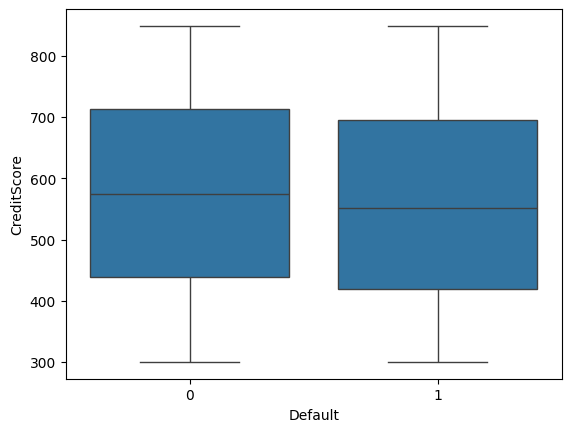

In [63]:
sns.boxplot(data=train_data, x="Default", y="CreditScore")

In [64]:
train_data.groupby("CreditScoreBucket")["InterestRate"].describe()

/var/folders/h2/_bm1jp99475dcdr3xrm_3tn40000gn/T/ipykernel_79188/31235850.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  train_data.groupby("CreditScoreBucket")["InterestRate"].describe()


,count,mean,std,min,25%,50%,75%,max
CreditScoreBucket,,,,,,,,
"(0, 100]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(100, 200]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(200, 300]",149.0,14.049329,6.742208,2.19,9.180,13.62,20.5800,24.88
"(300, 400]",16379.0,13.501905,6.667573,2.00,7.695,13.48,19.2400,25.00
"(400, 500]",16262.0,13.504558,6.630860,2.00,7.840,13.44,19.2975,25.00
"(500, 600]",16327.0,13.415037,6.629469,2.00,7.710,13.29,19.2000,25.00
"(600, 700]",16129.0,13.467593,6.613727,2.00,7.750,13.45,19.2200,25.00
"(700, 800]",16114.0,13.460202,6.636010,2.00,7.730,13.33,19.2300,25.00
"(800, 900]",8011.0,13.532842,6.628827,2.00,7.910,13.45,19.2700,25.00


In [67]:
data.groupby("CreditScoreBucket")["InterestRate"].describe()

/var/folders/h2/_bm1jp99475dcdr3xrm_3tn40000gn/T/ipykernel_79188/1656202026.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby("CreditScoreBucket")["InterestRate"].describe()


,count,mean,std,min,25%,50%,75%,max
CreditScoreBucket,,,,,,,,
"(0, 100]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(100, 200]",0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(200, 300]",241.0,13.884066,6.642753,2.02,8.89,13.62,20.21,24.88
"(300, 400]",23397.0,13.500427,6.644483,2.00,7.73,13.49,19.23,25.00
"(400, 500]",23248.0,13.490671,6.640766,2.00,7.80,13.43,19.25,25.00
"(500, 600]",23248.0,13.429405,6.622512,2.00,7.75,13.31,19.22,25.00
"(600, 700]",23019.0,13.491644,6.636477,2.00,7.75,13.45,19.28,25.00
"(700, 800]",23011.0,13.485110,6.643620,2.00,7.73,13.41,19.29,25.00
"(800, 900]",11509.0,13.554134,6.629946,2.00,7.90,13.44,19.32,25.00


In [69]:
train_data.groupby("Default")["InterestRate"].describe()

,count,mean,std,min,25%,50%,75%,max
Default,,,,,,,,
0,78875.0,13.157228,6.607849,2.0,7.45,12.940,18.85,25.0
1,10496.0,15.875688,6.341889,2.0,10.96,16.885,21.39,25.0


In [74]:
categorical_columns = train_data.select_dtypes(exclude=["number"]).columns

In [81]:
categorical_columns = categorical_columns[1:]

In [82]:
categorical_columns

Index(['EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents',
       'LoanPurpose', 'HasCoSigner'],
      dtype='object')

In [83]:
for column in categorical_columns:
    print(train_data[column].value_counts())
    print()

EmploymentType
Part-time        22550
Unemployed       22419
Full-time        22219
Self-employed    22183
Name: count, dtype: int64

MaritalStatus
Married     29855
Divorced    29765
Single      29751
Name: count, dtype: int64

HasMortgage
Yes    44694
No     44677
Name: count, dtype: int64

HasDependents
Yes    44710
No     44661
Name: count, dtype: int64

LoanPurpose
Business     17963
Home         17949
Education    17857
Other        17817
Auto         17785
Name: count, dtype: int64

HasCoSigner
Yes    44694
No     44677
Name: count, dtype: int64



<Axes: >

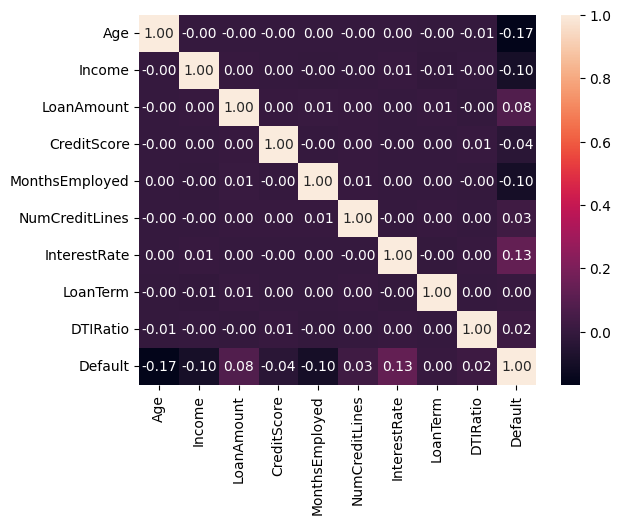

In [90]:
sns.heatmap(train_data.corr(numeric_only=True), annot=True, fmt='.2f')

In [94]:
train_data.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default,CreditScoreBucket
9987,SPEC99U9QC,19,134661,80894,504,91,3,11.62,36,0.75,High School,Full-time,Divorced,No,No,Education,No,1,"(500, 600]"
119957,5O885EPOMF,47,125379,106212,332,35,4,21.56,12,0.74,High School,Unemployed,Single,No,No,Auto,Yes,0,"(300, 400]"
80247,NV76OEJDWK,61,99506,227468,733,107,4,19.52,12,0.28,Bachelor's,Full-time,Divorced,Yes,No,Home,No,0,"(700, 800]"
5449,563L3PZL6F,68,105594,206318,366,119,4,14.89,12,0.47,Master's,Unemployed,Single,No,No,Business,Yes,0,"(300, 400]"
100055,CFWUXIH6V7,57,60101,206292,400,31,3,23.38,48,0.74,PhD,Self-employed,Divorced,No,Yes,Home,No,0,"(300, 400]"


In [96]:
train_data["LoanTerm"].value_counts().sort_index()

LoanTerm
12    17892
24    17782
36    17894
48    17930
60    17873
Name: count, dtype: int64

In [97]:
train_data["NumCreditLines"].value_counts().sort_index()

NumCreditLines
1    22196
2    22582
3    22296
4    22297
Name: count, dtype: int64

In [101]:
def create_features(df):
    df["Loan/Income_RATIO"] = df["LoanAmount"] / df["Income"]
    df["Education-Employ"] = df["Education"] + " - " + df["EmploymentType"]
    df["HasMortage-Depedents"] = df["HasMortgage"] + " - " + df["HasDependents"]
    df["NumCreditLines-Marital"] = df["NumCreditLines"].astype("str") + " - " + df["MaritalStatus"]
    df["CreditScoreBucket"] = pd.cut(df["CreditScore"], bins=[0, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1001])
    df["CreditScore-MonthsEmployed"] = df["CreditScoreBucket"].astype("str") + ' - ' + df["MonthsEmployed"].astype("str")

In [102]:
create_features(train_data)
create_features(val_data)

In [103]:
train_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasDependents,LoanPurpose,HasCoSigner,Default,CreditScoreBucket,Loan/Income_RATIO,Education-Employ,HasMortage-Depedents,NumCreditLines-Marital,CreditScore-MonthsEmployed
9987,SPEC99U9QC,19,134661,80894,504,91,3,11.62,36,0.75,...,No,Education,No,1,"(500, 600]",0.600723,High School - Full-time,No - No,3 - Divorced,"(500, 600] - 91"
119957,5O885EPOMF,47,125379,106212,332,35,4,21.56,12,0.74,...,No,Auto,Yes,0,"(300, 400]",0.847128,High School - Unemployed,No - No,4 - Single,"(300, 400] - 35"
80247,NV76OEJDWK,61,99506,227468,733,107,4,19.52,12,0.28,...,No,Home,No,0,"(700, 800]",2.285973,Bachelor's - Full-time,Yes - No,4 - Divorced,"(700, 800] - 107"
5449,563L3PZL6F,68,105594,206318,366,119,4,14.89,12,0.47,...,No,Business,Yes,0,"(300, 400]",1.953880,Master's - Unemployed,No - No,4 - Single,"(300, 400] - 119"
100055,CFWUXIH6V7,57,60101,206292,400,31,3,23.38,48,0.74,...,Yes,Home,No,0,"(300, 400]",3.432422,PhD - Self-employed,No - Yes,3 - Divorced,"(300, 400] - 31"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,LAMLHZKUP6,67,30309,235924,387,64,1,23.03,24,0.49,...,No,Home,Yes,0,"(300, 400]",7.783959,High School - Self-employed,No - No,1 - Single,"(300, 400] - 64"
48744,UENA3D7YKN,48,71196,108735,733,84,3,19.80,24,0.88,...,No,Auto,No,0,"(700, 800]",1.527263,Bachelor's - Unemployed,No - No,3 - Single,"(700, 800] - 84"
97334,Y4LLAG1QFK,42,51427,200431,590,96,3,8.09,12,0.88,...,No,Home,Yes,0,"(500, 600]",3.897389,Master's - Part-time,No - No,3 - Married,"(500, 600] - 96"
19767,DYONT6L8KB,40,110734,68918,488,79,2,18.28,60,0.17,...,Yes,Other,No,0,"(400, 500]",0.622374,High School - Self-employed,No - Yes,2 - Married,"(400, 500] - 79"


In [104]:
train_data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner', 'Default',
       'CreditScoreBucket', 'Loan/Income_RATIO', 'Education-Employ',
       'HasMortage-Depedents', 'NumCreditLines-Marital',
       'CreditScore-MonthsEmployed'],
      dtype='object')

# Encoding

In [119]:
categorical_columns = train_data.select_dtypes(exclude=["number"]).columns

In [120]:
categorical_columns

Index(['LoanID', 'Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage',
       'HasDependents', 'LoanPurpose', 'HasCoSigner', 'CreditScoreBucket',
       'Education-Employ', 'HasMortage-Depedents', 'NumCreditLines-Marital',
       'CreditScore-MonthsEmployed'],
      dtype='object')

In [136]:
ordinal_cols = ["Education", "HasDependents", "HasMortgage", "HasCoSigner"]
onehot_cols = ["EmploymentType", "MaritalStatus", "LoanPurpose"]
target_cols = ['Education-Employ', 'HasMortage-Depedents', 'NumCreditLines-Marital', 'CreditScore-MonthsEmployed']

In [137]:
train_data["Education"].value_counts()

Education
Bachelor's     22525
High School    22365
Master's       22242
PhD            22239
Name: count, dtype: int64

In [138]:
from category_encoders.ordinal import OrdinalEncoder
from category_encoders.one_hot import OneHotEncoder
from category_encoders.target_encoder import TargetEncoder

In [139]:
ordinal_encoder = OrdinalEncoder(
    cols=ordinal_cols,
    mapping=[
        {
            "col": "Education",
            "mapping": {"High School": 0, "Bachelor's": 1, "Master's": 2, "PhD": 3}
        },
        {
            "col": "HasDependents",
            "mapping": {"No": 0, "Yes": 1}
        },
        {
            "col": "HasMortgage",
            "mapping": {"No": 0, "Yes": 1}
        },
        {
            "col": "HasCoSigner",
            "mapping": {"No": 0, "Yes": 1}
        }
    ]
)
onehot_encoder = OneHotEncoder(cols=onehot_cols, use_cat_names=True)
target_encoder = TargetEncoder(cols=target_cols)

In [140]:
ordinal_encoder = ordinal_encoder.fit(X=train_data)
onehot_encoder = onehot_encoder.fit(X=train_data)
target_encoder = target_encoder.fit(X=train_data, y=train_data["Default"])

### Train data encoding

In [141]:
enconded_train_data = ordinal_encoder.transform(X=train_data)
enconded_train_data = target_encoder.transform(X=enconded_train_data)
enconded_train_data = onehot_encoder.transform(X=enconded_train_data)

In [142]:
enconded_train_data

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType_Full-time,EmploymentType_Unemployed,EmploymentType_Self-employed,EmploymentType_Part-time,MaritalStatus_Divorced,MaritalStatus_Single,MaritalStatus_Married,HasMortgage,HasDependents,LoanPurpose_Education,LoanPurpose_Auto,LoanPurpose_Home,LoanPurpose_Business,LoanPurpose_Other,HasCoSigner,Default,CreditScoreBucket,Loan/Income_RATIO,Education-Employ,HasMortage-Depedents,NumCreditLines-Marital,CreditScore-MonthsEmployed
9987,SPEC99U9QC,19,134661,80894,504,91,3,11.62,36,0.75,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,"(500, 600]",0.600723,0.100887,0.135920,0.128616,0.114865
119957,5O885EPOMF,47,125379,106212,332,35,4,21.56,12,0.74,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,"(300, 400]",0.847128,0.152422,0.135920,0.133432,0.179686
80247,NV76OEJDWK,61,99506,227468,733,107,4,19.52,12,0.28,1,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,"(700, 800]",2.285973,0.102509,0.121268,0.138209,0.094595
5449,563L3PZL6F,68,105594,206318,366,119,4,14.89,12,0.47,2,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,"(300, 400]",1.953880,0.134122,0.135920,0.133432,0.059260
100055,CFWUXIH6V7,57,60101,206292,400,31,3,23.38,48,0.74,3,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,0,"(300, 400]",3.432422,0.100975,0.113442,0.128616,0.166665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98048,LAMLHZKUP6,67,30309,235924,387,64,1,23.03,24,0.49,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,"(300, 400]",7.783959,0.134013,0.135920,0.112453,0.080883
48744,UENA3D7YKN,48,71196,108735,733,84,3,19.80,24,0.88,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,"(700, 800]",1.527263,0.140136,0.135920,0.124564,0.079137
97334,Y4LLAG1QFK,42,51427,200431,590,96,3,8.09,12,0.88,2,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,"(500, 600]",3.897389,0.117406,0.135920,0.105573,0.107692
19767,DYONT6L8KB,40,110734,68918,488,79,2,18.28,60,0.17,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,"(400, 500]",0.622374,0.134013,0.113442,0.104426,0.075632


In [143]:
enconded_train_data.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType_Full-time',
       'EmploymentType_Unemployed', 'EmploymentType_Self-employed',
       'EmploymentType_Part-time', 'MaritalStatus_Divorced',
       'MaritalStatus_Single', 'MaritalStatus_Married', 'HasMortgage',
       'HasDependents', 'LoanPurpose_Education', 'LoanPurpose_Auto',
       'LoanPurpose_Home', 'LoanPurpose_Business', 'LoanPurpose_Other',
       'HasCoSigner', 'Default', 'CreditScoreBucket', 'Loan/Income_RATIO',
       'Education-Employ', 'HasMortage-Depedents', 'NumCreditLines-Marital',
       'CreditScore-MonthsEmployed'],
      dtype='object')

### Test data encoding

In [149]:
enconded_val_data = ordinal_encoder.transform(X=val_data)
enconded_val_data = target_encoder.transform(X=enconded_val_data)
enconded_val_data = onehot_encoder.transform(X=enconded_val_data)

In [144]:
features = [
    'Age', 'Income', 'LoanAmount', 'CreditScore',
    'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
    'DTIRatio', 'Education', 'EmploymentType_Full-time',
    'EmploymentType_Unemployed', 'EmploymentType_Self-employed',
    'EmploymentType_Part-time', 'MaritalStatus_Divorced',
    'MaritalStatus_Single', 'MaritalStatus_Married', 'HasMortgage',
    'HasDependents', 'LoanPurpose_Education', 'LoanPurpose_Auto',
    'LoanPurpose_Home', 'LoanPurpose_Business', 'LoanPurpose_Other',
    'HasCoSigner', 'Loan/Income_RATIO',
    'Education-Employ', 'HasMortage-Depedents', 'NumCreditLines-Marital',
    'CreditScore-MonthsEmployed'
]

# Training

## Baseline model

In [154]:
baseline_model = xgb.XGBClassifier(random_state=1)

In [155]:
baseline_model.fit(X=enconded_train_data[features], y=enconded_train_data["Default"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [156]:
pred_train = baseline_model.predict(enconded_train_data[features])
pred_val = baseline_model.predict(enconded_val_data[features])

In [157]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["Default"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     78875
           1       0.86      0.21      0.34     10496

    accuracy                           0.90     89371
   macro avg       0.88      0.60      0.64     89371
weighted avg       0.90      0.90      0.88     89371



In [158]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["Default"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     16923
           1       0.47      0.09      0.15      2228

    accuracy                           0.88     19151
   macro avg       0.68      0.54      0.54     19151
weighted avg       0.84      0.88      0.84     19151



In [159]:
enconded_train_data["Default"].value_counts()

Default
0    78875
1    10496
Name: count, dtype: int64

In [162]:
scale_pos_weight = round(78875/10496, 2)

In [163]:
scale_pos_weight

7.51

## Hyperparameter tuning

In [176]:
params_grid = {
    "n_estimators": [20, 50, 100],
    "max_depth": [3, 10, 50, 100],
    "subsample": [0.3, 0.6, 0.9],
    "colsample_bytree": [0.3, 0.6, 0.9],
    "colsample_bynode": [0.3, 0.6, 0.9]
}

tuner = GridSearchCV(
    estimator=xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=1),
    param_grid=params_grid,
    scoring="recall",
    return_train_score=True,
    n_jobs=-1,
    verbose=2
)

In [177]:
tuner.fit(X=enconded_train_data[features], y=enconded_train_data["Default"])

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=20, subsample=0.3; total time=   0.3s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=20, subsample=0.9; total time=   0.3s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.4s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.6s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.6s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=20, subsample=0.9; total time=   0.5s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.9s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=100, subsample=0.6; total time=  

/Users/xavierfigueroa/Documents/Bootcamp/.env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.3, 0.6, 0.9],
                         'colsample_bytree': [0.3, 0.6, 0.9],
                         'max_depth': [3, 10, 50, 100],
                         'n_estimators': [20, 50, 100],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=2)

In [179]:
tuner_best_model = tuner.best_estimator_

In [180]:
pred_train = tuner_best_model.predict(enconded_train_data[features])
pred_val = tuner_best_model.predict(enconded_val_data[features])

In [181]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["Default"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.94      0.69      0.80     78875
           1       0.23      0.69      0.35     10496

    accuracy                           0.69     89371
   macro avg       0.59      0.69      0.57     89371
weighted avg       0.86      0.69      0.74     89371



In [182]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["Default"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     16923
           1       0.22      0.67      0.33      2228

    accuracy                           0.68     19151
   macro avg       0.58      0.68      0.56     19151
weighted avg       0.86      0.68      0.74     19151



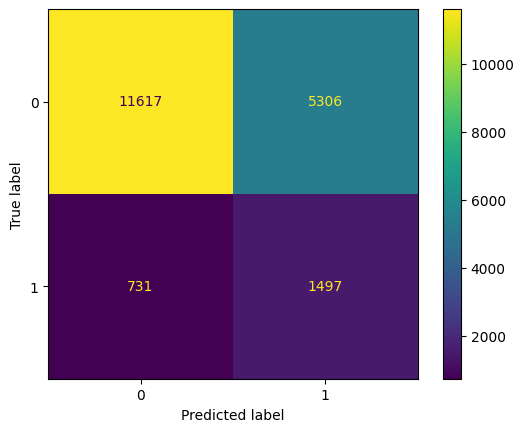

In [188]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["Default"], y_pred=pred_val)

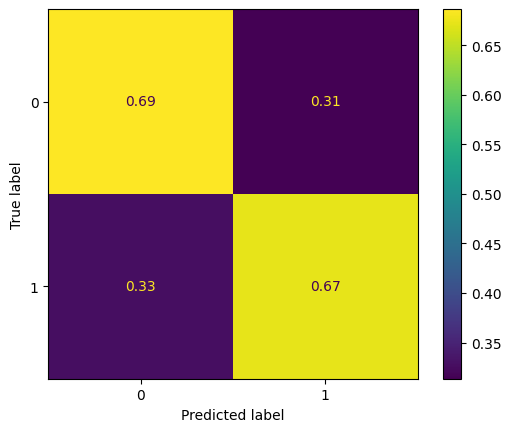

In [187]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["Default"], y_pred=pred_val, normalize="true")

In [195]:
import matplotlib.pyplot as plt
import shap

In [215]:
explainer = shap.TreeExplainer(
    tuner_best_model,
    data=enconded_train_data[features].sample(n=1000, random_state=1),
    model_output="probability"
)

In [216]:
explanation = explainer(enconded_val_data[features])

In [217]:
explanation.shape

(19151, 30)

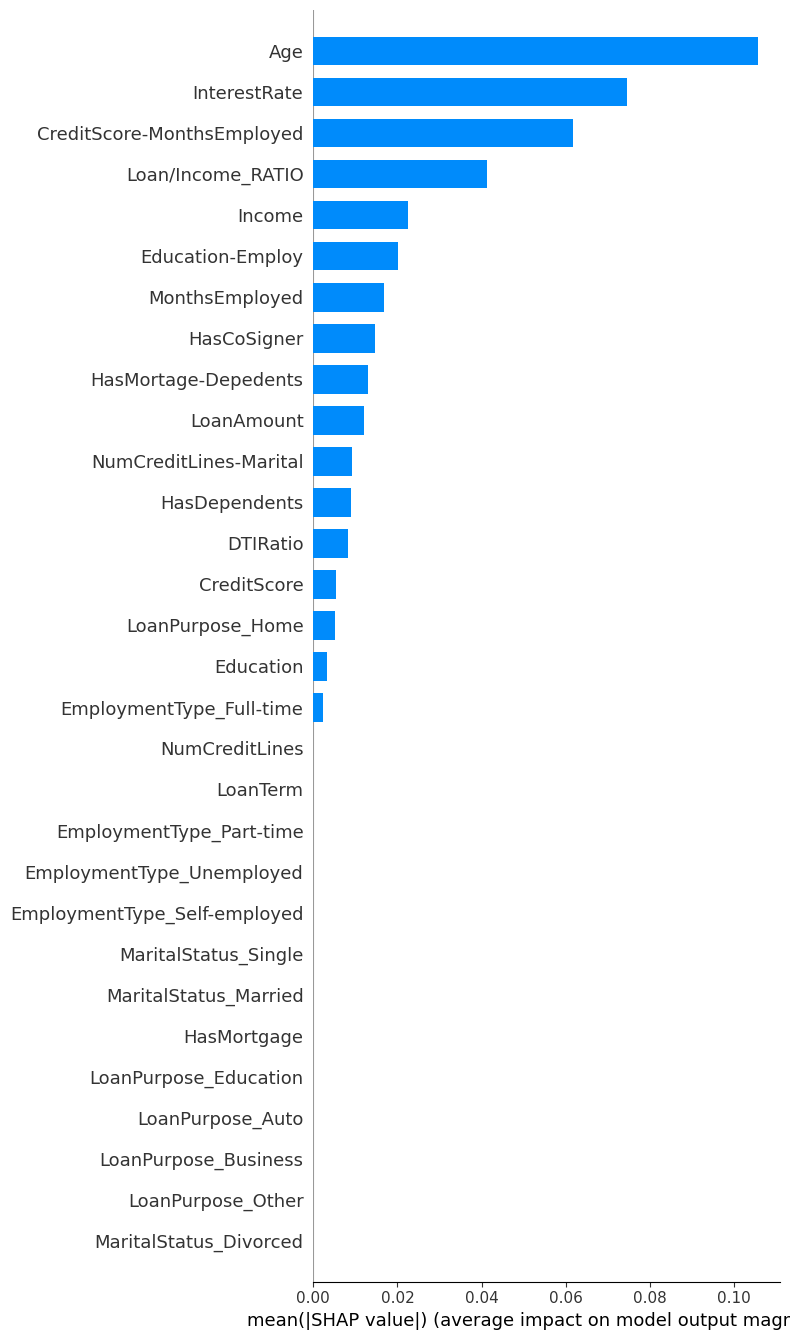

In [218]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[features], plot_type="bar", max_display=31)

In [219]:
x = pd.concat([train_data["Education-Employ"], enconded_train_data["Education-Employ"]], axis=1)
x.columns = ["original", "encoded"]

In [220]:
x.drop_duplicates().sort_values("encoded")

,original,encoded
27903,Master's - Full-time,0.084614
9385,PhD - Full-time,0.090612
9987,High School - Full-time,0.100887
100055,PhD - Self-employed,0.100975
80247,Bachelor's - Full-time,0.102509
58073,Master's - Self-employed,0.104944
62226,PhD - Part-time,0.107111
127205,Master's - Part-time,0.117406
76319,Bachelor's - Part-time,0.122613
83935,Bachelor's - Self-employed,0.123379


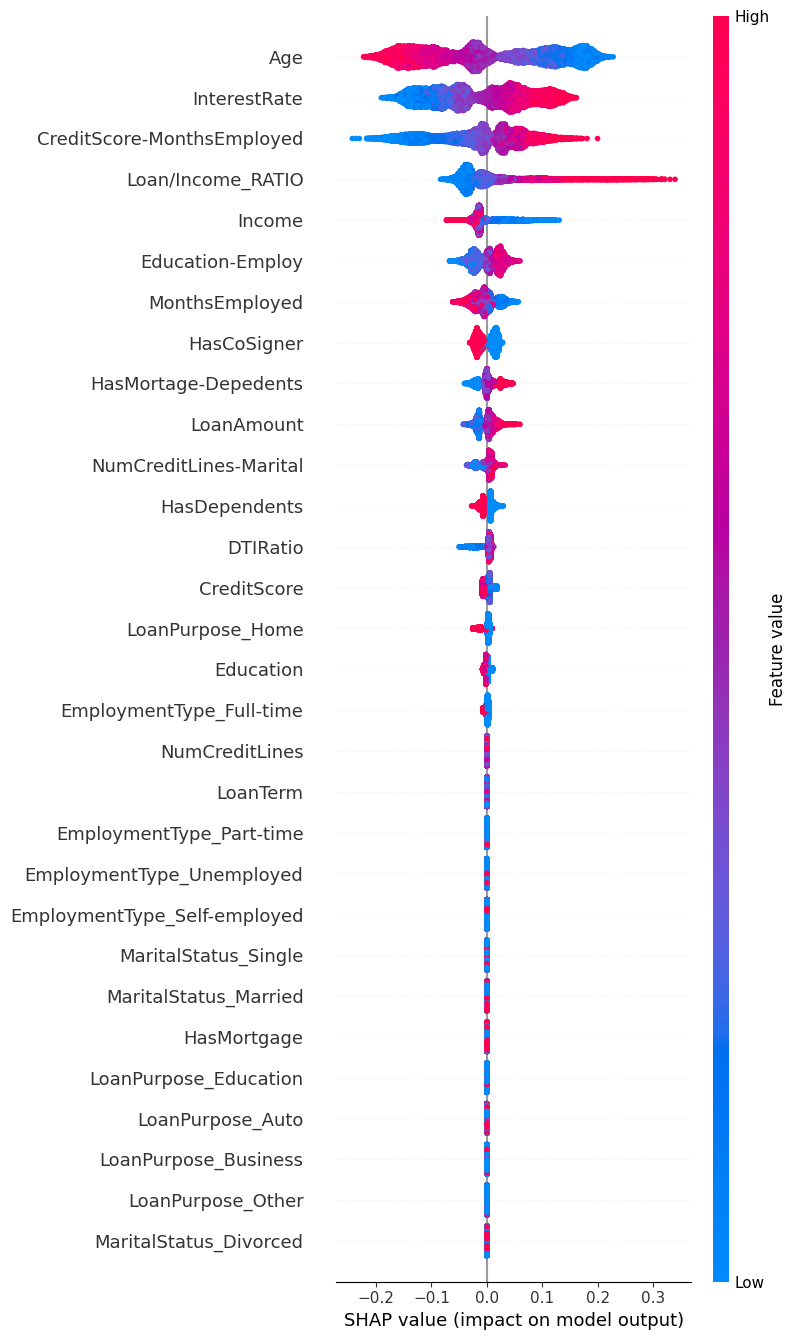

In [221]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[features], max_display=31)

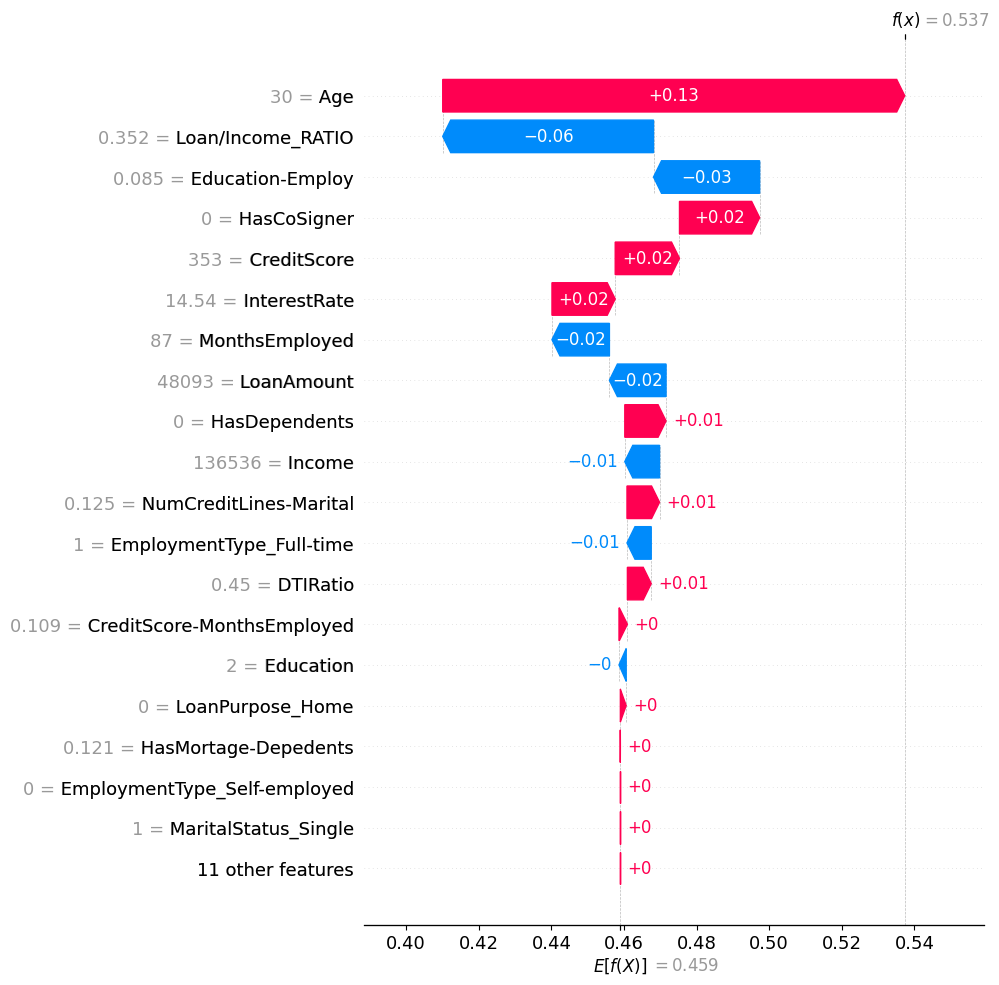

In [225]:
shap.plots.waterfall(explanation[8], max_display=20)

# Round 2

In [228]:
new_features = [
    'Age',
    'Income',
    'LoanAmount',
    'CreditScore',
    'MonthsEmployed',
    'InterestRate',
    'DTIRatio',
    'Education',
    'HasDependents',
    'LoanPurpose_Home',
    'HasCoSigner',
    'Loan/Income_RATIO',
    'Education-Employ',
    'HasMortage-Depedents',
    'NumCreditLines-Marital',
    'CreditScore-MonthsEmployed'
]

## Baseline model

In [229]:
baseline_model = xgb.XGBClassifier(random_state=1)

In [230]:
baseline_model.fit(X=enconded_train_data[new_features], y=enconded_train_data["Default"])

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [231]:
pred_train = baseline_model.predict(enconded_train_data[new_features])
pred_val = baseline_model.predict(enconded_val_data[new_features])

In [232]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["Default"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     78875
           1       0.87      0.20      0.32     10496

    accuracy                           0.90     89371
   macro avg       0.88      0.60      0.64     89371
weighted avg       0.90      0.90      0.87     89371



In [233]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["Default"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     16923
           1       0.47      0.10      0.16      2228

    accuracy                           0.88     19151
   macro avg       0.68      0.54      0.55     19151
weighted avg       0.84      0.88      0.85     19151



In [234]:
enconded_train_data["Default"].value_counts()

Default
0    78875
1    10496
Name: count, dtype: int64

In [235]:
scale_pos_weight = round(78875/10496, 2)

In [236]:
scale_pos_weight

7.51

## Hyperparameter tuning

In [237]:
params_grid = {
    "n_estimators": [20, 50, 100],
    "max_depth": [3, 10, 50, 100],
    "subsample": [0.3, 0.6, 0.9],
    "colsample_bytree": [0.3, 0.6, 0.9],
    "colsample_bynode": [0.3, 0.6, 0.9]
}

tuner_round2 = GridSearchCV(
    estimator=xgb.XGBClassifier(scale_pos_weight=scale_pos_weight, random_state=1),
    param_grid=params_grid,
    scoring="recall",
    return_train_score=True,
    n_jobs=-1,
    verbose=2
)

In [239]:
tuner_round2.fit(X=enconded_train_data[new_features], y=enconded_train_data["Default"])

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=20, subsample=0.3; total time=   0.2s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=20, subsample=0.9; total time=   0.1s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=100, subsample=0.3; total time=   0.4s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.3s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=20, subsample=0.9; total time=   0.3s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=50, subsample=0.6; total time=   0.5s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=100, subsample=0.3; total time=  

/Users/xavierfigueroa/Documents/Bootcamp/.env/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=20, subsample=0.6; total time=   0.2s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=50, subsample=0.3; total time=   0.3s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.2s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.4s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=20, subsample=0.3; total time=   0.2s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=50, subsample=0.3; total time=   0.4s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=50, subsample=0.9; total time=   0.4s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_depth=10, n_estimators=100, subsample=0.6; total time=   0.8s
[CV] END colsample_bynode=0.3, colsample_bytree=0.3, max_d

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=1, ...),
             n_jobs=-1,
             param_grid={'colsample_bynode': [0.3, 0.6, 0.9],
                         'colsample_bytree': [0.3, 0.6, 0.9],
                         'max_depth': [3, 10, 50, 100],
                         'n_estimators': [20, 50, 100],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='recall', verbose=2)

In [240]:
tuner2_best_model = tuner_round2.best_estimator_

In [241]:
pred_train = tuner2_best_model.predict(enconded_train_data[new_features])
pred_val = tuner2_best_model.predict(enconded_val_data[new_features])

In [252]:
# pred_train = tuner2_best_model.predict(enconded_train_data[new_features])
# pred_val = tuner2_best_model.predict(enconded_val_data[new_features])

pred_train = (tuner2_best_model.predict_proba(enconded_train_data[new_features])[:,1] > 0.4).astype("int")
pred_val = (tuner2_best_model.predict_proba(enconded_val_data[new_features])[:,1] > 0.4).astype("int")

In [254]:
print("Training metrics (cutoff-point): 0.4")
print(classification_report(y_true=enconded_train_data["Default"], y_pred=pred_train))

Training metrics (cutoff-point): 0.4
              precision    recall  f1-score   support

           0       0.96      0.53      0.68     78875
           1       0.19      0.83      0.31     10496

    accuracy                           0.56     89371
   macro avg       0.57      0.68      0.50     89371
weighted avg       0.87      0.56      0.64     89371



In [242]:
print("Training metrics")
print(classification_report(y_true=enconded_train_data["Default"], y_pred=pred_train))

Training metrics
              precision    recall  f1-score   support

           0       0.95      0.69      0.80     78875
           1       0.23      0.70      0.35     10496

    accuracy                           0.69     89371
   macro avg       0.59      0.70      0.57     89371
weighted avg       0.86      0.69      0.75     89371



In [256]:
print("Validation metrics (cutoff-point): 0.4")
print(classification_report(y_true=enconded_val_data["Default"], y_pred=pred_val))

Validation metrics (cutoff-point): 0.4
              precision    recall  f1-score   support

           0       0.95      0.52      0.67     16923
           1       0.18      0.80      0.30      2228

    accuracy                           0.55     19151
   macro avg       0.57      0.66      0.48     19151
weighted avg       0.86      0.55      0.63     19151



In [243]:
print("Validation metrics")
print(classification_report(y_true=enconded_val_data["Default"], y_pred=pred_val))

Validation metrics
              precision    recall  f1-score   support

           0       0.94      0.69      0.79     16923
           1       0.22      0.67      0.33      2228

    accuracy                           0.69     19151
   macro avg       0.58      0.68      0.56     19151
weighted avg       0.86      0.69      0.74     19151



(cutoff-point): 0.4


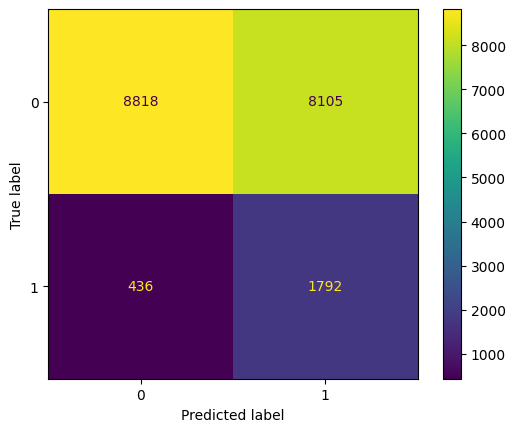

In [257]:
print("(cutoff-point): 0.4")
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["Default"], y_pred=pred_val)

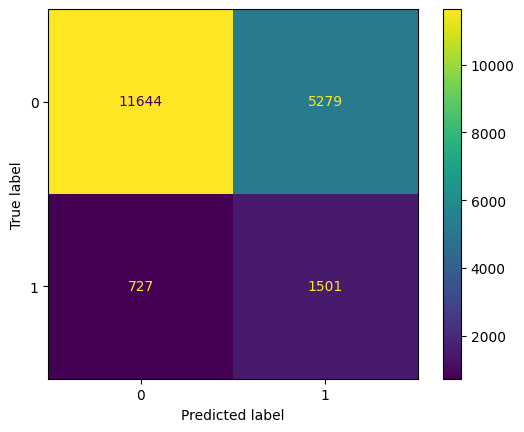

In [244]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["Default"], y_pred=pred_val)

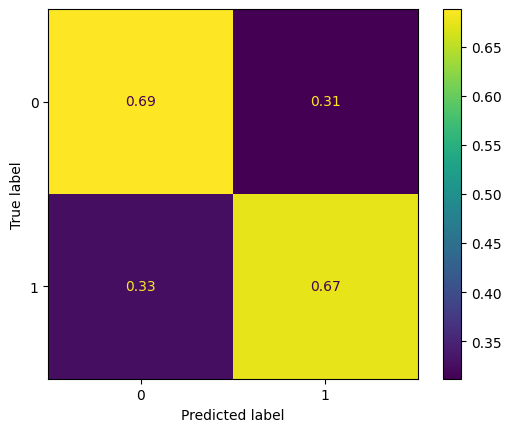

In [245]:
ConfusionMatrixDisplay.from_predictions(y_true=enconded_val_data["Default"], y_pred=pred_val, normalize="true")

In [195]:
import matplotlib.pyplot as plt
import shap

In [258]:
explainer = shap.TreeExplainer(
    tuner2_best_model,
    data=enconded_train_data[new_features].sample(n=1000, random_state=1),
    model_output="probability"
)

In [259]:
explanation = explainer(enconded_val_data[new_features])

In [260]:
explanation.shape

(19151, 16)

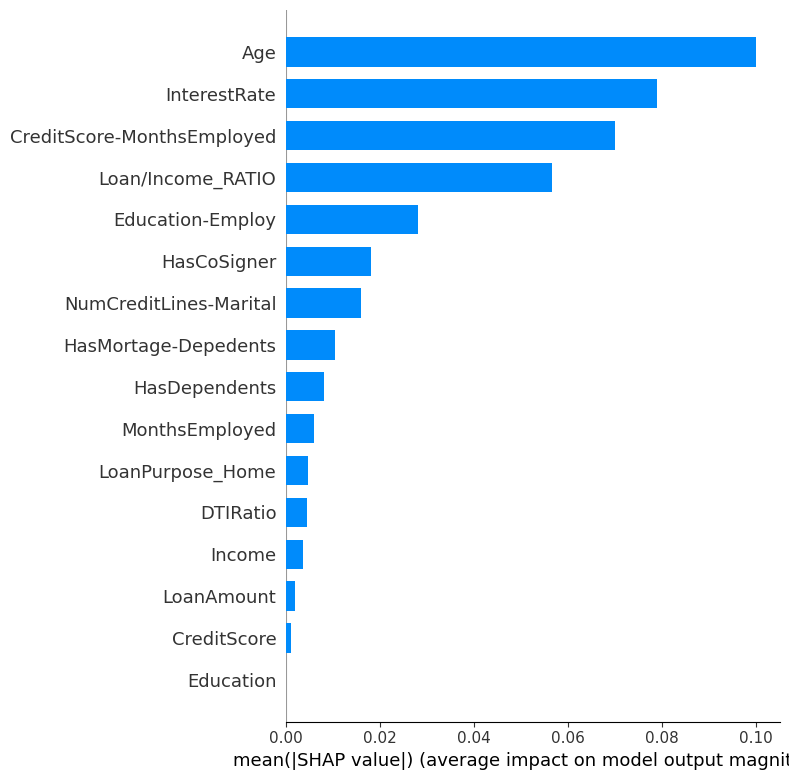

In [261]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[new_features], plot_type="bar", max_display=31)

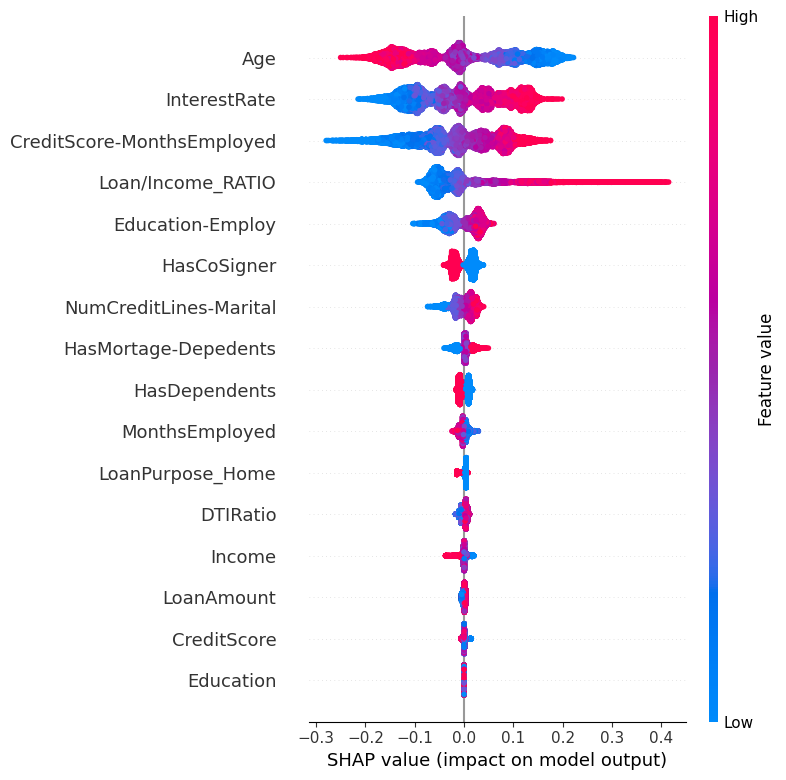

In [262]:
plt.figure(figsize=(20,8))
shap.summary_plot(explanation.values, features=enconded_val_data[new_features], max_display=31)

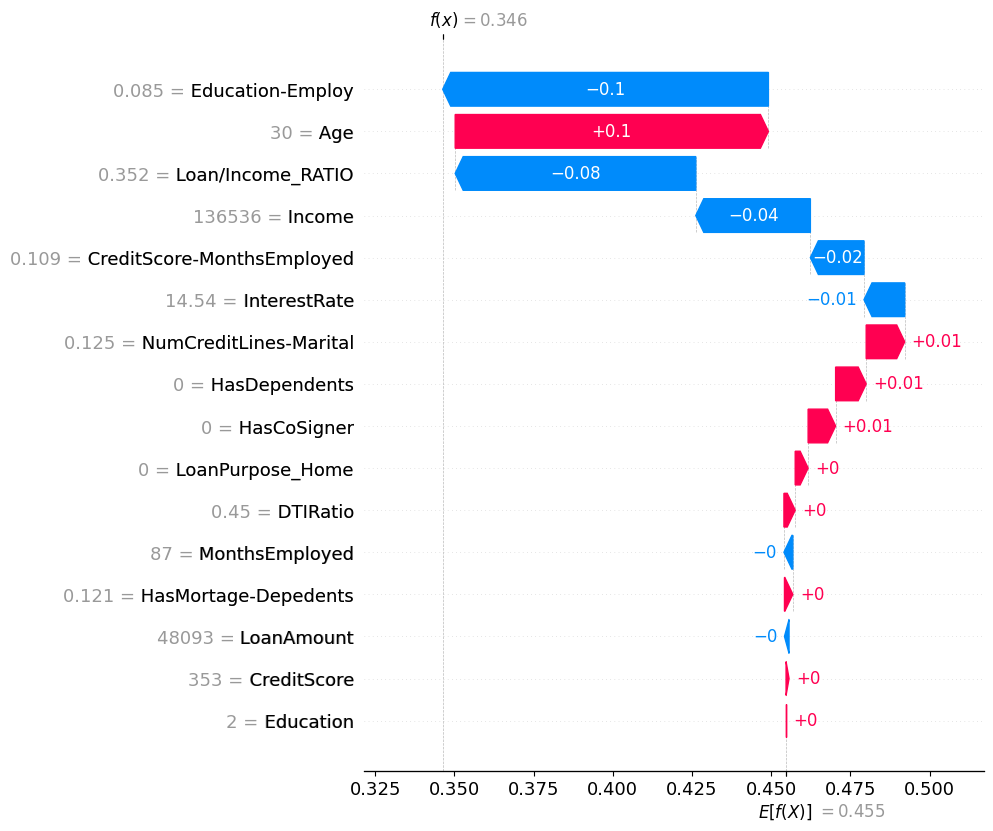

In [263]:
shap.plots.waterfall(explanation[8], max_display=20)